In [9]:
!pip install seaborn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

In [11]:
!git clone https://github.com/maniram3112/stock-vs-crypto-risk-return-analysis.git

fatal: destination path 'stock-vs-crypto-risk-return-analysis' already exists and is not an empty directory.


In [23]:
plt.style.use("ggplot")
sns.set_palette("Set2")

# Replace with your GitHub raw link
url = "stock-vs-crypto-risk-return-analysis/data/merged.csv"

# Read CSV
data = pd.read_csv(url)

# Create a folder to save results
output_dir = "analysis_results"
os.makedirs(output_dir, exist_ok=True)


print(data.head())

         time       BTC     ETH     XRP      AAPL      AMZN    GOOGL  \
0  28-09-2020  10699.00  354.01  0.2410  111.8236  158.7025  72.4334   
1  29-09-2020  10841.29  359.92  0.2428  110.9774  157.2440  72.7989   
2  30-09-2020  10779.42  359.82  0.2418  112.6505  157.4365  72.7781   
3  01-10-2020  10622.79  353.21  0.2381  113.6037  161.0630  73.8854   
4  02-10-2020  10576.64  345.83  0.2341  109.9366  156.2500  72.2815   

    INFY.NS      MSFT  RELIANCE.NS     TCS.NS      TSLA  
0  898.6018  200.8164    1004.9171  2256.1423  140.4000  
1  897.3566  198.7261    1017.9759  2313.8877  139.6900  
2  896.6896  201.6698    1013.1241  2317.5142  143.0033  
3  905.0495  203.7120    1008.9979  2346.4792  149.3867  
4  905.0495  197.7002    1008.9979  2346.4792  138.3633  


## Summary Statistics

Basic statistics per asset:
                 BTC          ETH          XRP         AAPL         AMZN  \
count    1299.000000  1299.000000  1299.000000  1299.000000  1299.000000   
mean    50049.889161  2378.394904     0.924102   171.841624   159.850371   
std     28497.733464   984.062953     0.777452    36.750175    37.435891   
min     10576.640000   340.850000     0.211500   105.802500    81.820000   
25%     27267.550000  1659.330000     0.467600   143.003650   131.835000   
50%     42852.180000  2301.980000     0.584000   168.815600   162.249500   
75%     64280.310000  3121.545000     1.015000   196.472900   182.821000   
max    123374.560000  4830.600000     3.552000   258.103700   242.060000   

             GOOGL      INFY.NS         MSFT  RELIANCE.NS       TCS.NS  \
count  1299.000000  1299.000000  1299.000000  1299.000000  1299.000000   
mean    135.182844  1460.969975   327.899335  1190.440824  3373.667946   
std      33.884193   217.417216    86.360213   178.625096   435.6

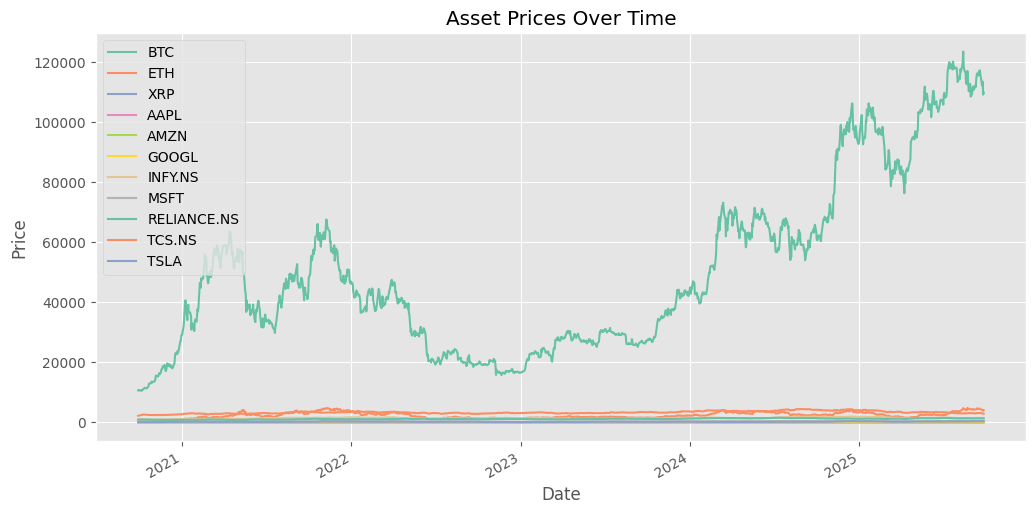

In [24]:
# Convert 'time' to datetime
data["time"] = pd.to_datetime(data["time"], format="%d-%m-%Y")
data = data.sort_values("time")

# Set 'time' as index (optional, makes calculations easier)
data.set_index("time", inplace=True)

# ------------------------------
# Basic statistics for each asset
# ------------------------------
print("Basic statistics per asset:")
print(data.describe())  # mean, std, min, max, etc.

# Save to csv
data.to_csv(f"{output_dir}/cleaned_prices.csv")

# ------------------------------
# Daily returns for each asset
# ------------------------------
returns = data.pct_change()  # % change between consecutive days
returns.to_csv(f"{output_dir}/daily_returns.csv")

# ------------------------------
# Annualized return & volatility
# ------------------------------
summary = pd.DataFrame()
summary["mean_return"] = returns.mean()
summary["volatility"] = returns.std()

# Annualize
summary["Annualized Return"] = summary["mean_return"] * 252
summary["Annualized Volatility"] = summary["volatility"] * np.sqrt(252)

# Sharpe Ratio (assuming risk-free rate = 0)
summary["Sharpe Ratio"] = summary["Annualized Return"] / summary["Annualized Volatility"]

print("\nSummary statistics for all assets:")
print(summary)

# Summary CSV
summary.to_csv(f"{output_dir}/summary_statistics.csv")

# Plot prices
plt.figure(figsize=(12,6))
data.plot(ax=plt.gca())
plt.title("Asset Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.savefig(f"{output_dir}/prices.png", dpi=300)
plt.show()
plt.close()

## Trend Analysis

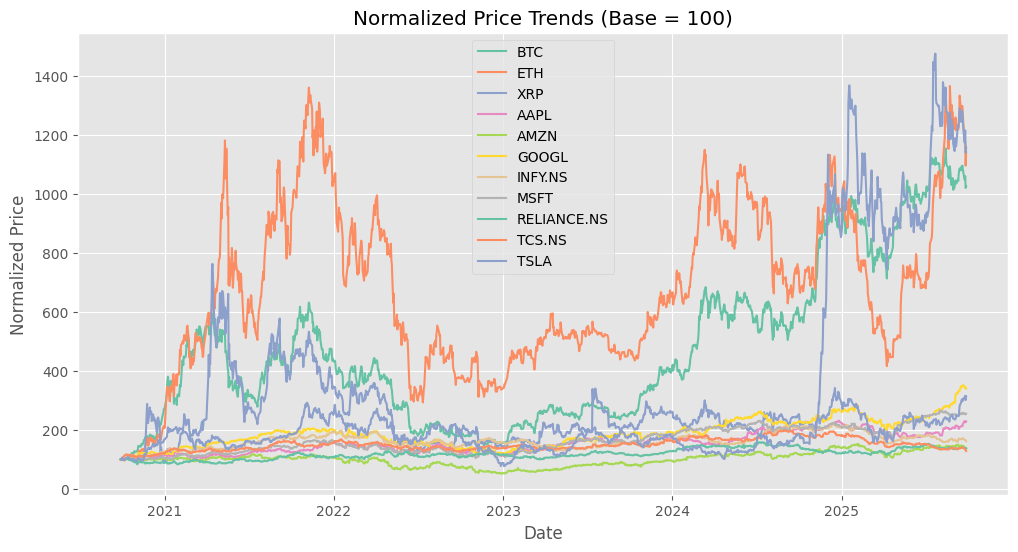

In [21]:
# ------------------------------
# Trend Analysis
# ------------------------------

# Normalize prices (base = 100)
normalized = data / data.iloc[0] * 100

plt.figure(figsize=(12,6))
for col in normalized.columns:
    plt.plot(normalized.index, normalized[col], label=col)

plt.legend()
plt.title("Normalized Price Trends (Base = 100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.savefig(f"{output_dir}/normalized_prices.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Return Distributions

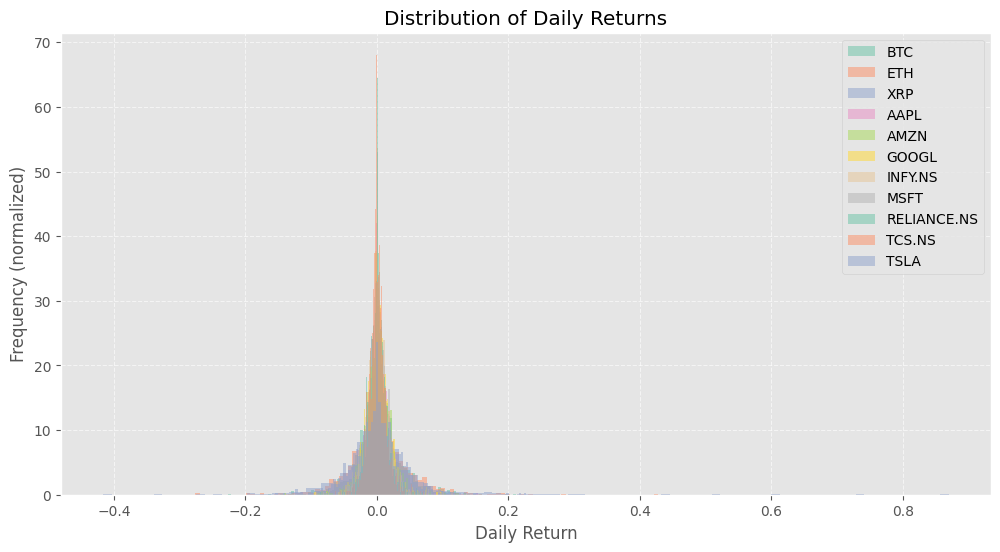

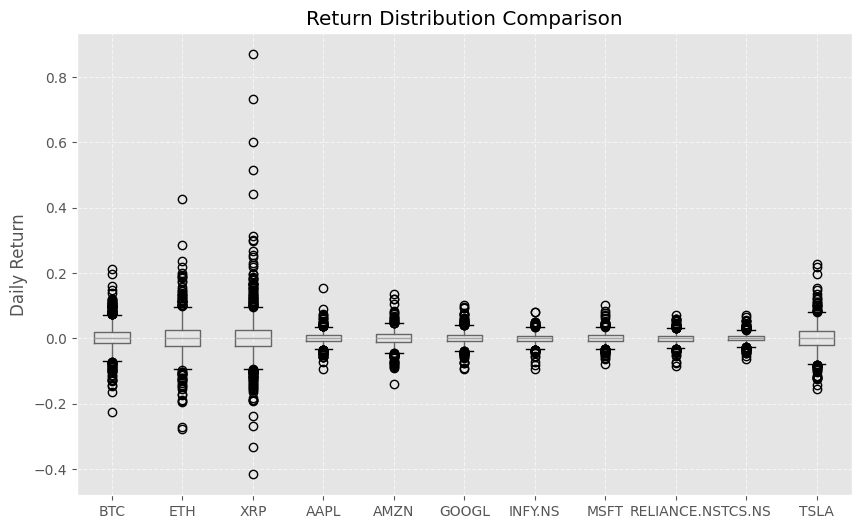

In [26]:
# Calculate daily returns if not already done
returns = data.pct_change().dropna()

# Histogram of returns
plt.figure(figsize=(12,6))
for col in returns.columns:
    plt.hist(returns[col], bins=100, alpha=0.5, label=col, density=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency (normalized)")
plt.legend()
plt.savefig(f"{output_dir}/daily_returns_distribution.png", dpi=300)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Boxplot comparison
plt.figure(figsize=(10,6))
returns.boxplot()
plt.title("Return Distribution Comparison")
plt.ylabel("Daily Return")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig(f"{output_dir}/returns_comparison.png", dpi=300)
plt.show()


In [28]:
import shutil

# Create a zip file with all results
shutil.make_archive("results", 'zip', output_dir)

# Download the zip file
files.download("results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>